In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/zainsiddiqi/Data Analyst upskilling/CovidData/CasesVsVaccinations.csv')
df['date'] = pd.to_datetime(df['date'])
df_UK = df[df['location'] == 'United Kingdom'].copy()
df_UK[['date', 'cumulative_cases', 'cumulative_vaccinations']]


,date,cumulative_cases,cumulative_vaccinations
372333,2020-01-05,0,0
372334,2020-01-06,0,0
372335,2020-01-07,0,0
372336,2020-01-08,0,0
372337,2020-01-09,0,0
...,...,...,...
373974,2024-07-03,24951602,148342453
373975,2024-07-04,24951602,148342453
373976,2024-07-05,24951602,148342453
373977,2024-07-06,24951602,148342453


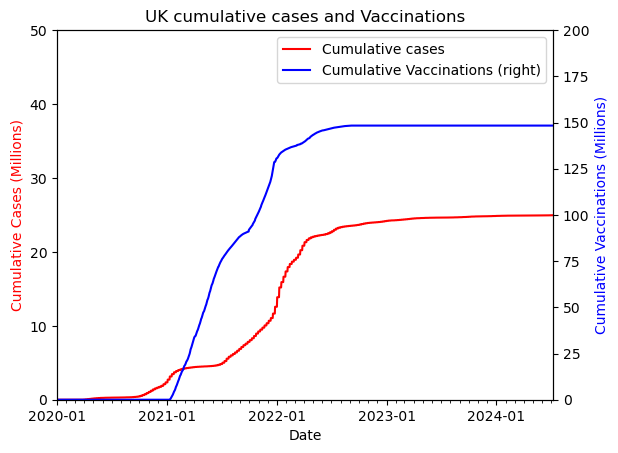

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, ScalarFormatter, FuncFormatter
'''date = df_UK['date']
cumulative_deaths = df_UK['cumulative_deaths']
cumulative_vaccinations = df_UK['cumulative_vaccinations']'''
ax = df_UK.plot(x = 'date', y = 'cumulative_cases', label = 'Cumulative cases', color = 'r')
df_UK.plot(x = 'date', y = 'cumulative_vaccinations', label = 'Cumulative Vaccinations', color = 'b', secondary_y = True, ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Cases (Millions)', color='r')
ax.right_ax.set_ylabel('Cumulative Vaccinations (Millions)', color='b')
ax.set_ylim(0, 50000000)
ax.right_ax.set_ylim(0, 200000000)
ax.set_xlim([pd.Timestamp('2020-01'),df_UK['date'].max()])

def millions(x, pos):
    'The two args are the value and tick position'
    return '%d' % (x * 1e-6)

formatter = FuncFormatter(millions)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.yaxis.set_major_formatter(formatter)
ax.right_ax.yaxis.set_major_formatter(formatter)
plt.title('UK cumulative cases and Vaccinations')
plt.show()
